In [47]:
import pandas as pd 
import numpy as np
import csv
import os.path
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#import for scoring the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#training using logistical regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [80]:
#import
final_games_data = pd.read_csv(r'./Data/final_games_data.csv', dtype = np.array(np.dtype('float64')))

Text(0, 0.5, 'diff_cspm')

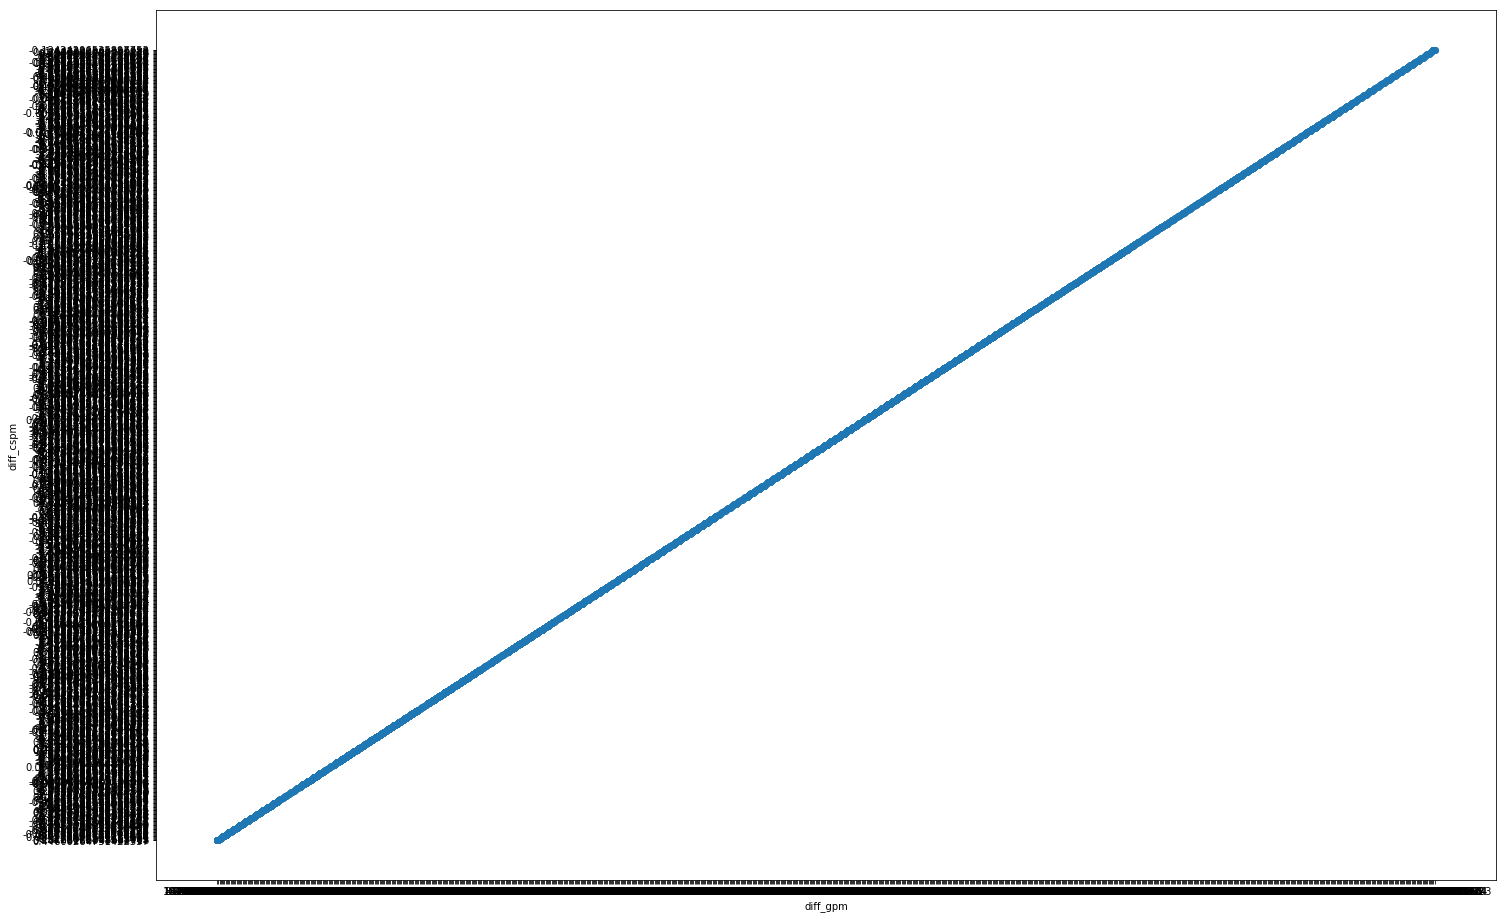

In [3]:
#plotting correlation of gpm and cspm
fig, ax = plt.subplots(figsize=(24,16))
plt.scatter(final_games_data['diff_gpm'], final_games_data['diff_cspm'])

plt.xlabel('diff_gpm')
plt.ylabel('diff_cspm')

In [81]:
#changing types to float
final_games_data['result']=final_games_data['result'].astype('float64')
final_games_data['diff_assists']=final_games_data['diff_assists'].astype('float64')
final_games_data['diff_cspm']=final_games_data['diff_cspm'].astype('float64')
final_games_data['diff_damage']=final_games_data['diff_damage'].astype('float64')
final_games_data['diff_dmgperminute']=final_games_data['diff_dmgperminute'].astype('float64')
final_games_data['diff_gpm']=final_games_data['diff_gpm'].astype('float64')
final_games_data['diff_fbaron_time']=final_games_data['diff_fbaron_time'].astype('float64')
final_games_data['diff_first_blood']=final_games_data['diff_first_blood'].astype('float64')
final_games_data['diff_firstdeath']=final_games_data['diff_firstdeath'].astype('float64')
final_games_data['diff_first_tower']=final_games_data['diff_first_tower'].astype('float64')
final_games_data['diff_match_duration']=final_games_data['diff_match_duration'].astype('float64')
final_games_data['diff_gold_spent']=final_games_data['diff_gold_spent'].astype('float64')
final_games_data['diff_herald_time']=final_games_data['diff_herald_time'].astype('float64')
final_games_data['diff_kills']=final_games_data['diff_kills'].astype('float64')
final_games_data['diff_kpm']=final_games_data['diff_kpm'].astype('float64')
final_games_data['diff_minion_kills']=final_games_data['diff_minion_kills'].astype('float64')
final_games_data['diff_drag_kills']=final_games_data['diff_drag_kills'].astype('float64')
final_games_data['diff_tower_kills']=final_games_data['diff_tower_kills'].astype('float64')
final_games_data['totalgold']=final_games_data['totalgold'].astype('float64')
final_games_data['diff_vision_wards']=final_games_data['diff_vision_wards'].astype('float64')
final_games_data['diff_monster_kills']=final_games_data['diff_monster_kills'].astype('float64')

In [5]:
#original correlation
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,diff_gold_spent,diff_herald_time,diff_kills,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_monster_kills
result,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.320486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diff_assists,0.000000,1.000000,0.301874,-0.441452,0.740980,0.883248,-0.203858,-0.253212,-0.054894,-0.077747,...,0.196537,0.168045,0.969864,0.000000,-0.207370,0.588537,0.867791,0.406543,0.049322,0.494806
diff_cspm,0.000000,0.301874,1.000000,-0.517481,0.385919,0.569638,0.090459,0.173136,0.264270,0.071536,...,0.362819,-0.047998,0.302307,0.000000,0.415530,0.328707,0.466435,0.484153,-0.098625,0.591389
diff_damage,0.000000,-0.441452,-0.517481,1.000000,-0.142962,-0.545675,-0.123400,-0.176515,0.025431,0.046010,...,-0.271483,-0.068319,-0.404898,0.000000,-0.194692,-0.351247,-0.592180,-0.443296,-0.165742,-0.419276
diff_dmgperminute,0.000000,0.740980,0.385919,-0.142962,1.000000,0.727746,-0.163676,-0.176771,0.154859,-0.001844,...,0.317562,0.000484,0.737891,0.000000,-0.008069,0.440931,0.677704,0.444072,-0.137880,0.500767
diff_gpm,0.000000,0.883248,0.569638,-0.545675,0.727746,1.000000,-0.237543,-0.225144,-0.034459,-0.082965,...,0.154994,0.118800,0.906249,0.000000,-0.189910,0.670261,0.944141,0.391087,-0.091577,0.577284
diff_fbaron_time,0.000000,-0.203858,0.090459,-0.123400,-0.163676,-0.237543,1.000000,0.340046,0.228067,0.130539,...,0.543617,-0.258097,-0.228200,0.000000,0.637062,-0.102853,-0.148641,0.480655,0.473220,0.242928
diff_first_blood,0.000000,-0.253212,0.173136,-0.176515,-0.176771,-0.225144,0.340046,1.000000,0.174131,0.371527,...,0.393083,-0.187366,-0.329244,0.000000,0.552600,-0.021214,-0.138856,0.357225,0.346227,0.192849
diff_firstdeath,0.000000,-0.054894,0.264270,0.025431,0.154859,-0.034459,0.228067,0.174131,1.000000,0.075566,...,0.314675,-0.060738,-0.057823,0.000000,0.421187,-0.328788,-0.017559,0.285971,0.009544,0.119886
diff_first_tower,0.000000,-0.077747,0.071536,0.046010,-0.001844,-0.082965,0.130539,0.371527,0.075566,1.000000,...,0.294398,-0.140750,-0.092724,0.000000,0.304113,0.182082,-0.073035,0.256588,0.210419,0.192357


In [25]:
def fit_ols(x,y):
    model = sm.OLS(y,x)
    results = model.fit()
    return results.summary()

In [20]:
def generate_x_y(df, target):
    X = df.loc[:, df.columns != target].values
    Y = df.loc[:, df.columns == target].values
    return X,Y

In [67]:
final_games_data

,team,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,...,diff_gold_spent,diff_herald_time,diff_kills,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_monster_kills
0,Cloud9,1,5.728555045871559,0.44600264731422357,-0.4184633027522935,326.6154822822832,86.58215671525227,-0.8629115104277503,-0.7477452888800444,0.25686172055504386,...,367.00791284403385,0.7275361449942626,2.5878440366972484,0.08318058011272939,-14.377752293578055,0.08910550458715605,1.6868119266055048,1744.4044724770647,2.7676605504587215,9.534288990825672
1,FlyQuest,0,5.728555045871559,0.44600264731422357,-0.4184633027522935,326.6154822822832,86.58215671525227,-0.8629115104277503,-0.7477452888800444,0.25686172055504386,...,367.00791284403385,0.7275361449942626,2.5878440366972484,-0.08318058011272939,-14.377752293578055,0.08910550458715605,1.6868119266055048,1744.4044724770647,2.7676605504587215,9.534288990825672
2,Team Liquid,1,1.9401709401709404,0.20773152545582718,-0.14658119658119695,-91.51594527648103,18.086663512763153,-1.2598235773532842,-1.5116576731772051,-0.36910832151196615,...,-5143.908404558402,-0.08115017086181808,0.25840455840455867,0.0360904231005697,-70.1176638176637,0.18803418803418825,-0.32122507122507127,-4629.765099715092,-4.375498575498575,-18.331908831908834
3,Team SoloMid,0,1.9401709401709404,0.20773152545582718,-0.14658119658119695,-91.51594527648103,18.086663512763153,-1.2598235773532842,-1.5116576731772051,-0.36910832151196615,...,-5143.908404558402,-0.08115017086181808,0.25840455840455867,-0.0360904231005697,-70.1176638176637,0.18803418803418825,-0.32122507122507127,-4629.765099715092,-4.375498575498575,-18.331908831908834
4,Counter Logic Gaming,1,-0.8974481658692213,0.3126079892663469,0.16937799043062185,70.20926750714557,1.5912015074636656,0.8414145243843478,-0.5359004704701773,-0.366822469551515,...,206.32998405103717,-1.004961489263156,-0.25725677830940974,-0.008823576199361916,18.0708133971292,0.20462519936204138,-0.38133971291866064,74.91004784688994,6.135885167464117,-3.8044657097288734
5,100 Thieves,0,-0.8974481658692213,0.3126079892663469,0.16937799043062185,70.20926750714557,1.5912015074636656,0.8414145243843478,-0.5359004704701773,-0.366822469551515,...,206.32998405103717,-1.004961489263156,-0.25725677830940974,0.008823576199361916,18.0708133971292,0.20462519936204138,-0.38133971291866064,74.91004784688994,6.135885167464117,-3.8044657097288734
6,Clutch Gaming,0,2.0022172949002233,0.62926988658905,0.2342941611234295,33.54457210188548,8.289062486953753,-0.3134018840132988,-0.9941542743743526,-0.8096312205469332,...,-1211.7435328898791,0.3610947764634087,0.47782705099778333,0.014853608721729444,-7.209903917221027,-0.09830007390983009,-0.497413155949741,-1302.296378418323,-1.4349593495934911,-4.773466371027354
7,OpTic Gaming,1,2.0022172949002233,0.62926988658905,0.2342941611234295,33.54457210188548,8.289062486953753,-0.3134018840132988,-0.9941542743743526,-0.8096312205469332,...,-1211.7435328898791,0.3610947764634087,0.47782705099778333,-0.014853608721729444,-7.209903917221027,-0.09830007390983009,-0.497413155949741,-1302.296378418323,-1.4349593495934911,-4.773466371027354
8,Golden Guardians,1,-1.4074594257178532,-0.5278840161111091,-0.7112983770287151,-81.42702182198718,-40.950236287110556,0.02805719691634323,0.007846496347062804,0.2995894117089559,...,305.13576779026334,-0.17449978191323012,-0.5912921348314608,-0.02783443788951323,33.19803370786519,0.04900124843945042,-0.5933208489388271,310.76357677902706,8.994225967540572,-18.430087390761543
9,Echo Fox,0,-1.4074594257178532,-0.5278840161111091,-0.7112983770287151,-81.42702182198718,-40.950236287110556,0.02805719691634323,0.007846496347062804,0.2995894117089559,...,305.13576779026334,-0.17449978191323012,-0.5912921348314608,0.02783443788951323,33.19803370786519,0.04900124843945042,-0.5933208489388271,310.76357677902706,8.994225967540572,-18.430087390761543


In [49]:
def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns != target])
    return pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])],
        index=X_var.columns,
    )

In [82]:
#x,y = generate_x_y(final_games_data, target, team)
data_set = final_games_data.loc[:, final_games_data.columns != 'team']
target = 'result'
series = generate_vif(data_set, target)
list_remove = []
for i in series.index:
    if(series[i] >= 5):
        list_remove.append(i)

In [83]:
print(list_remove)

['diff_assists', 'diff_cspm', 'diff_gpm', 'diff_match_duration', 'diff_gold_spent', 'diff_kills', 'diff_minion_kills', 'diff_tower_kills', 'totalgold', 'diff_monster_kills']


In [35]:
x,y = generate_x_y(data_set, target)
index = 1
for i in data_set.columns:
    if(i == 'result'):
        continue
    print(index, ':', i)
    index += 1

1 : diff_assists
2 : diff_cspm
3 : diff_damage
4 : diff_dmgperminute
5 : diff_gpm
6 : diff_fbaron_time
7 : diff_first_blood
8 : diff_firstdeath
9 : diff_first_tower
10 : diff_match_duration
11 : diff_gold_spent
12 : diff_herald_time
13 : diff_kills
14 : diff_kpm
15 : diff_minion_kills
16 : diff_drag_kills
17 : diff_tower_kills
18 : totalgold
19 : diff_vision_wards
20 : diff_monster_kills


In [26]:
print(fit_ols(x,y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     18.46
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           5.18e-64
Time:                        20:54:06   Log-Likelihood:                -6663.8
No. Observations:                6382   AIC:                         1.337e+04
Df Residuals:                    6362   BIC:                         1.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0101      0.008      1.295      0.1

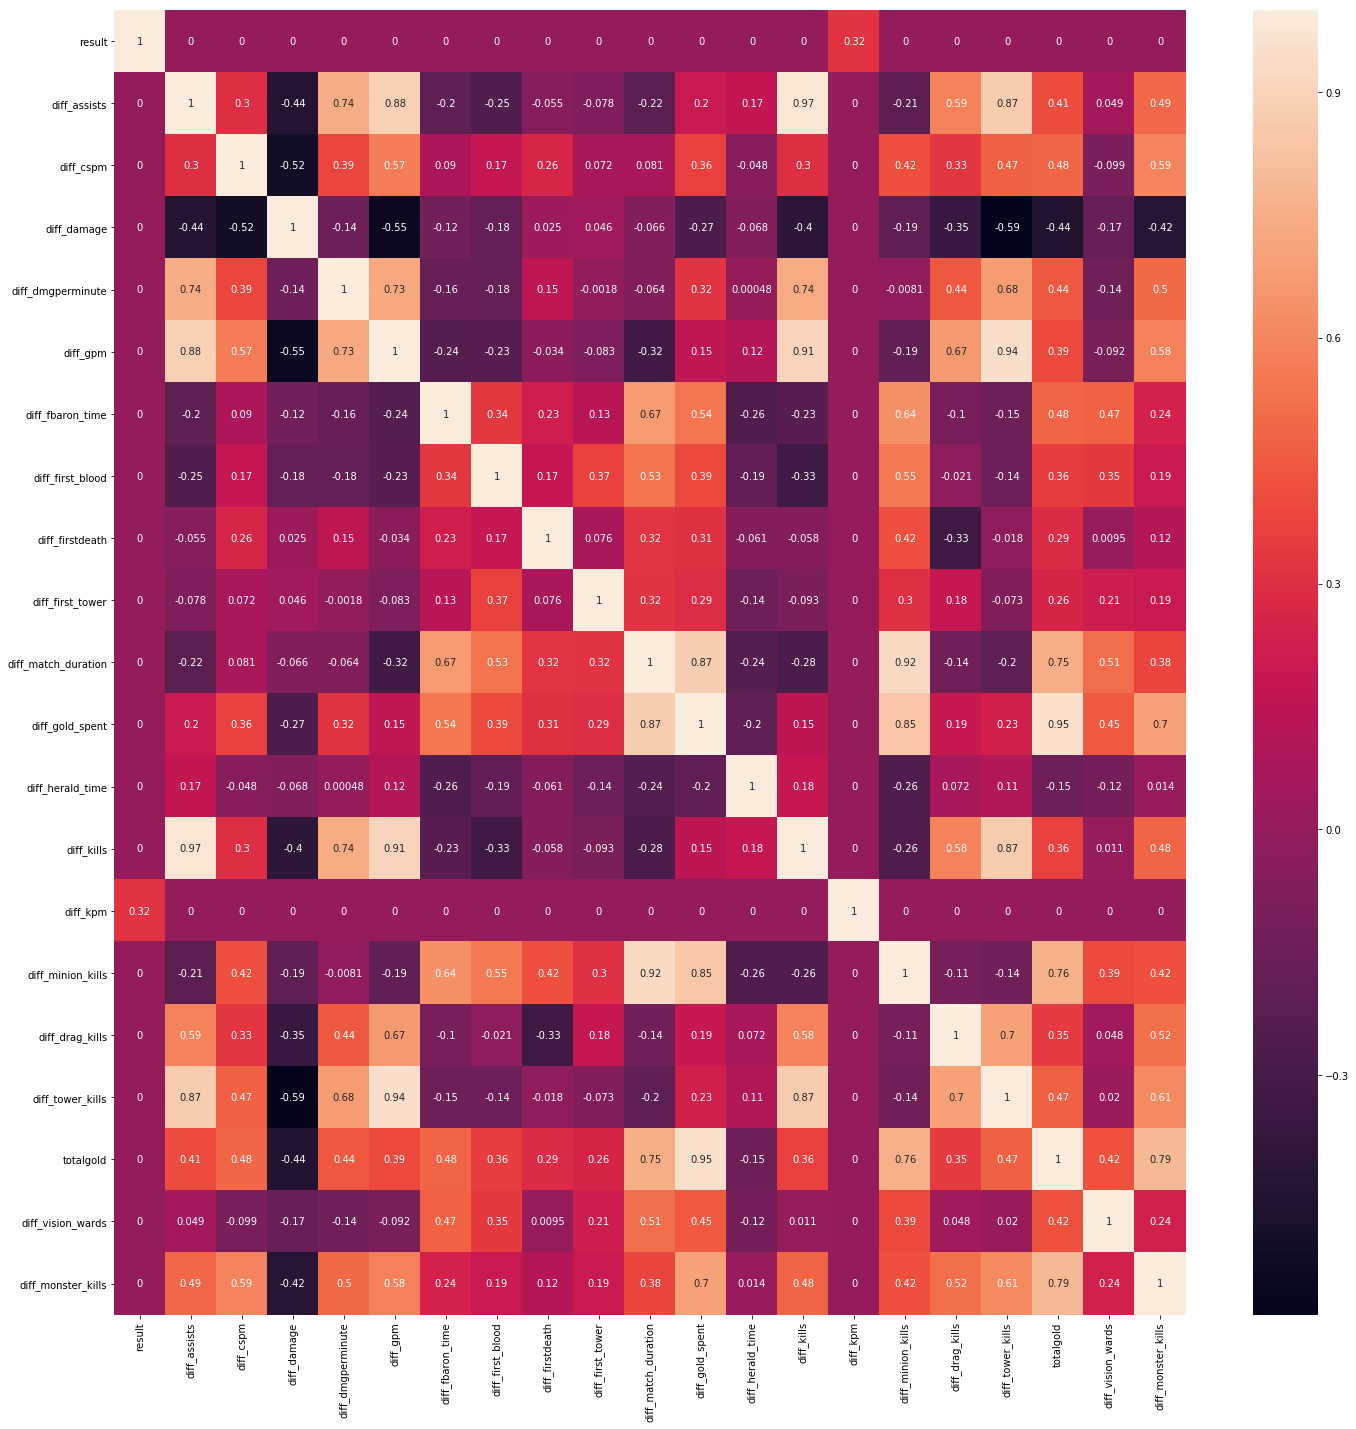

In [39]:
fig, ax = plt.subplots(figsize = (24,24))
sns.heatmap(final_games_data_corr, annot = True)

In [84]:
#droping colinear col
#final_games_data.drop(['diff_assists','diff_monster_kills','diff_cspm','diff_damage','diff_minion_kills','diff_kills','totalgold'], inplace=True, axis=1)
#final_games_data.drop(['diff_tower_kills'], inplace=True, axis=1)
for i in list_remove:
    final_games_data.drop([i], inplace = True, axis = 1)

Index(['team', 'result', 'diff_damage', 'diff_dmgperminute',
       'diff_fbaron_time', 'diff_first_blood', 'diff_firstdeath',
       'diff_first_tower', 'diff_herald_time', 'diff_kpm', 'diff_drag_kills',
       'diff_vision_wards'],
      dtype='object')

In [88]:
#looking at correlation for each col
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_damage,diff_dmgperminute,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_herald_time,diff_kpm,diff_drag_kills,diff_vision_wards
result,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320486,0.000000,0.000000
diff_damage,0.000000,1.000000,-0.142962,-0.123400,-0.176515,0.025431,0.046010,-0.068319,0.000000,-0.351247,-0.165742
diff_dmgperminute,0.000000,-0.142962,1.000000,-0.163676,-0.176771,0.154859,-0.001844,0.000484,0.000000,0.440931,-0.137880
diff_fbaron_time,0.000000,-0.123400,-0.163676,1.000000,0.340046,0.228067,0.130539,-0.258097,0.000000,-0.102853,0.473220
diff_first_blood,0.000000,-0.176515,-0.176771,0.340046,1.000000,0.174131,0.371527,-0.187366,0.000000,-0.021214,0.346227
diff_firstdeath,0.000000,0.025431,0.154859,0.228067,0.174131,1.000000,0.075566,-0.060738,0.000000,-0.328788,0.009544
diff_first_tower,0.000000,0.046010,-0.001844,0.130539,0.371527,0.075566,1.000000,-0.140750,0.000000,0.182082,0.210419
diff_herald_time,0.000000,-0.068319,0.000484,-0.258097,-0.187366,-0.060738,-0.140750,1.000000,0.000000,0.072374,-0.115488
diff_kpm,0.320486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
diff_drag_kills,0.000000,-0.351247,0.440931,-0.102853,-0.021214,-0.328788,0.182082,0.072374,0.000000,1.000000,0.047835


In [94]:
new_data_set = final_games_data.loc[:, final_games_data.columns != 'team']
target = 'result'
new_x, new_y = generate_x_y(new_data_set, target)
print(fit_ols(new_x, new_y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     35.85
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           6.55e-69
Time:                        21:24:36   Log-Likelihood:                -6669.2
No. Observations:                6382   AIC:                         1.336e+04
Df Residuals:                    6372   BIC:                         1.343e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0089      0.005     -1.831      0.0

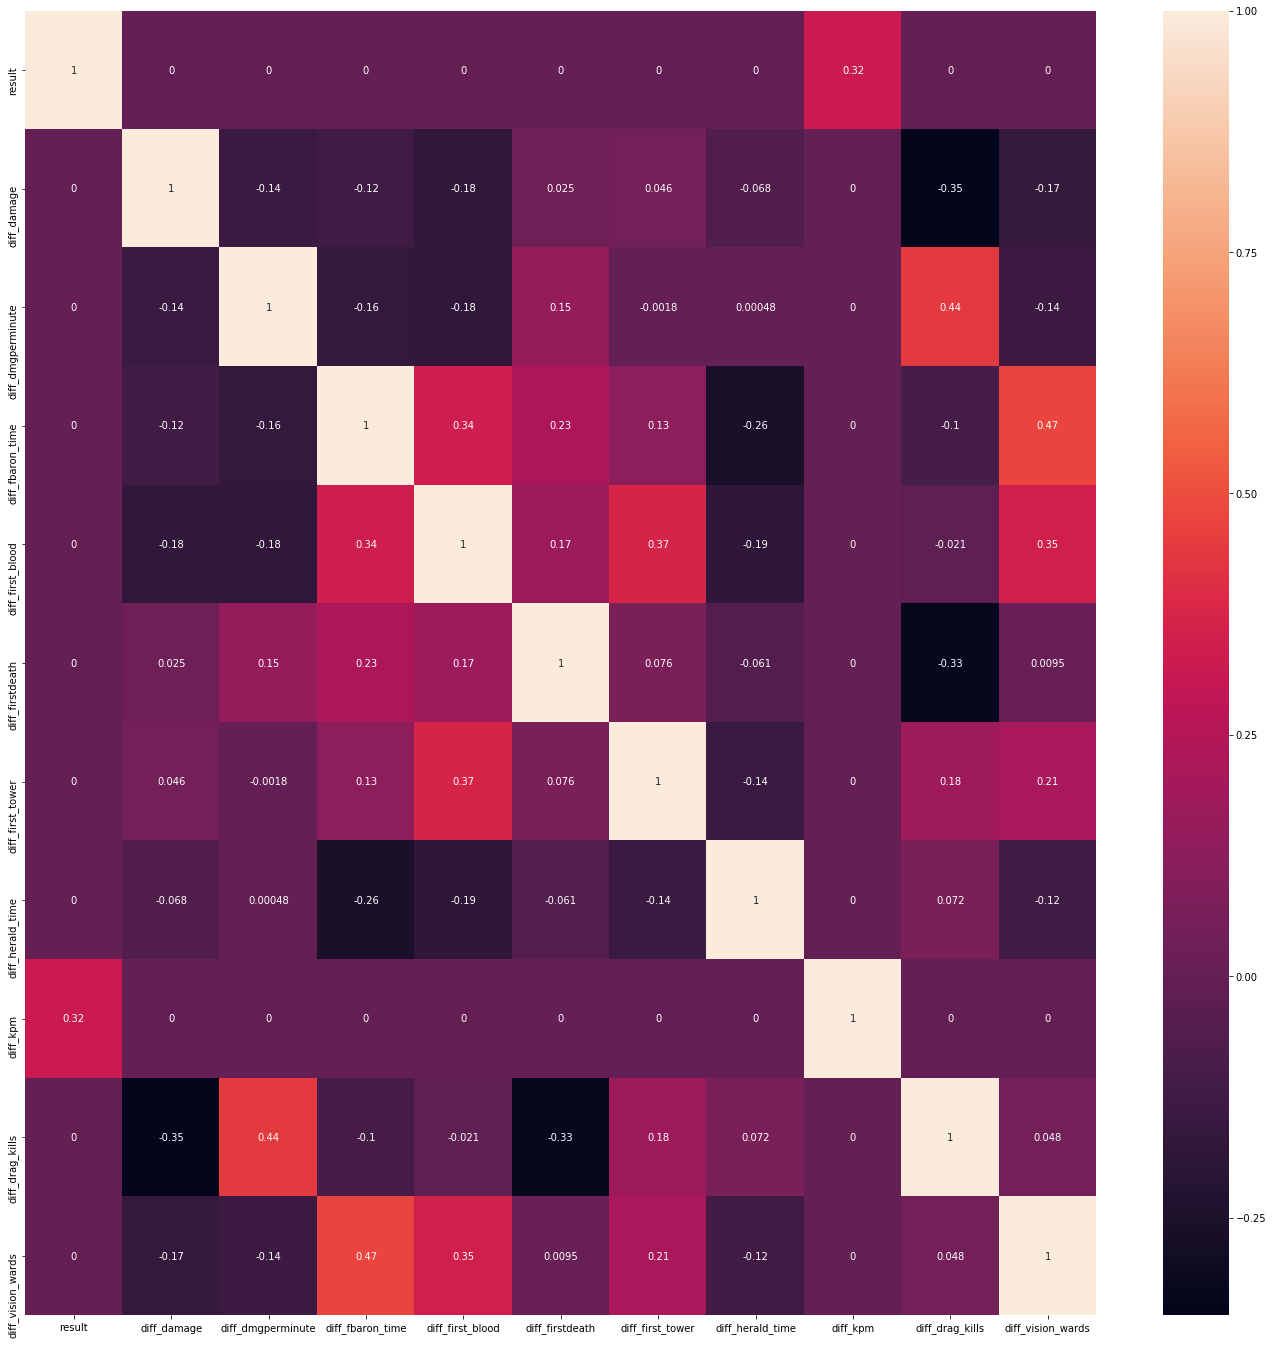

In [89]:
#correlation of each var with each other
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(final_games_data_corr, annot=True)

In [95]:
#convert teams into one hot encoding
le = preprocessing.LabelEncoder()
final_games_data = pd.get_dummies(final_games_data, columns=['team']);
final_games_data.head()

,result,diff_damage,diff_dmgperminute,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_herald_time,diff_kpm,diff_drag_kills,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,1.0,-0.418463,326.615482,-0.862912,-0.747745,0.256862,0.012985,0.727536,0.083181,0.089106,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-0.418463,326.615482,-0.862912,-0.747745,0.256862,0.012985,0.727536,-0.083181,0.089106,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-0.146581,-91.515945,-1.259824,-1.511658,-0.369108,0.218901,-0.081150,0.036090,0.188034,...,0,0,0,0,0,0,0,0,0,0
3,0.0,-0.146581,-91.515945,-1.259824,-1.511658,-0.369108,0.218901,-0.081150,-0.036090,0.188034,...,0,1,0,0,0,0,0,0,0,0
4,1.0,0.169378,70.209268,0.841415,-0.535900,-0.366822,0.214053,-1.004961,-0.008824,0.204625,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#splitting data to train
X= final_games_data.drop('result', axis=1)
Y= final_games_data['result']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [97]:
#shape of train data
x_train.shape, y_train.shape

((5105, 116), (5105,))

In [98]:
##shape of test data
x_test.shape, y_test.shape

((1277, 116), (1277,))

In [99]:
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [100]:
#prediction using the logistical model from prev cell
y_pred = logistic_model.predict(x_test)

In [101]:
#create dataframe of results
pred_results = pd.DataFrame({'y_test': y_test,
                            'y_pred': y_pred})

In [102]:
#total right and wrong of results
final_games_data_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
final_games_data_crosstab

y_test,0.0,1.0
y_pred,,
0.0,401,235
1.0,242,399


In [103]:
#scores
acc = accuracy_score(y_test, y_pred) #how many of the predicated values did the model get right
prec = precision_score(y_test, y_pred) #how many of the teams that the model thought won actually won
recall = recall_score(y_test, y_pred) #how many of the actual outcomes did the model correctly predict

print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall) #many false negatives

accuracy_score:  0.6264682850430697
precision_score:  0.6224648985959438
recall_score:  0.6293375394321766


In [34]:
final_games_data = final_games_data.sample(frac=1).reset_index(drop=True)
final_games_data.head()

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,1.0,-227.272253,-20.060672,-1.059209,-0.661784,0.556443,-0.849255,-4.397606,-8490.518970,0.587366,...,0,0,0,0,0,0,0,0,0,0
1,0.0,4.410488,-18.995191,-1.316075,-0.009589,0.266543,-0.648782,-1.554250,-3596.351545,0.505935,...,0,0,0,0,0,0,0,0,0,0
2,0.0,58.051419,61.312738,1.581656,-0.287583,1.631824,0.481973,1.006626,2734.522186,0.716544,...,0,0,0,0,0,0,0,0,0,0
3,1.0,-84.738500,1.592392,1.857971,0.711406,0.021098,0.169976,0.490458,457.632879,-0.135393,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-22.442542,-88.854924,2.051866,0.153915,0.112519,-0.241638,3.188691,3982.964802,-0.963003,...,0,0,0,0,0,0,0,0,0,0
